In [17]:
pip install python-constraint


Note: you may need to restart the kernel to use updated packages.


In [16]:
import csv
from constraint import *


# Read scheduling data from CSV file
schedule_data = []
with open('course_schedule.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        schedule_data.append(row)


# Generate class schedule
def generate_class_schedule(schedule_data):
    class_schedule = {}
    labs = ['Lab1', 'Lab2', 'Lab3', 'Lab4', 'Lab7', 'GLAB', 'HLAB', 'SLAB']
    lab_assignments = {}  # Dictionary to keep track of labs assigned to each time slot
    faculty_daily_classes = {}  # Dictionary to keep track of daily classes per faculty

    for row in schedule_data:
        start_time = row[0]
        days = row[1]
        course_no = row[2]
        faculty = row[5]

        # Ensure certain classes are scheduled on specific days or times (add your own conditions here)
        if course_no == 'SpecialClass' and 'Monday' not in days:
            continue

        if start_time in ['7:00 AM', '9:00 AM', '11:00 AM', '1:20 PM', '3:30 PM', '5:30 PM', '7:20 PM']:
            class_days = days.split('/')
        else:
            class_days = ['Monday/Wednesday', 'Tuesday/Thursday']

        for day in class_days:
            class_time_slots = class_schedule.setdefault(day, {}).setdefault(start_time, [])
            if labs:
                lab = labs.pop(0)
            else:
                labs = ['Lab1', 'Lab2', 'Lab3', 'Lab4', 'Lab7', 'GLAB', 'HLAB', 'SLAB']
                lab = labs.pop(0)

            # Ensure that faculty member doesn't teach two classes at the same time
            if faculty in lab_assignments.get((day, start_time), []):
                # Faculty already teaching at this time, skip this class
                continue
            lab_assignments.setdefault((day, start_time), []).append(faculty)

            # Ensure that a laboratory is not assigned to more than one class at the same time
            if lab in lab_assignments.get((day, start_time), []):
                # Lab already assigned for another class at this time, skip this class
                continue
            lab_assignments.setdefault((day, start_time), []).append(lab)

            # Limiting the number of classes that can be scheduled in a day for a particular faculty member
            if faculty_daily_classes.get((faculty, day), 0) >= 3:
                # Faculty already has 3 classes scheduled on this day, skip this class
                continue
            faculty_daily_classes.setdefault((faculty, day), 0)
            faculty_daily_classes[(faculty, day)] += 1

            class_time_slots.append((course_no, faculty, lab))

    return class_schedule


# Generate class schedule
class_schedule = generate_class_schedule(schedule_data)

# Print class schedule
for day, time_slots in class_schedule.items():
    print(day)
    for time_slot, classes in time_slots.items():
        if time_slot != '\ufeffStart_Time':  # Ignore the start time header
            print(f"\t{time_slot}")
            for course, faculty, lab in classes:
                print(f"\t\t{course} - {faculty} - Lab: {lab}")


Monday/Wednesday
	ï»¿Start_Time
		Course_No - Faculty - Lab: Lab1
Tuesday/Thursday
	ï»¿Start_Time
		Course_No - Faculty - Lab: Lab2
MW
	7:00 AM
		APT2010 - Mwangi, E - Lab: Lab3
		APT3050 - Gachanga E - Lab: Lab4
		APT3080 - Odera A - Lab: Lab7
		IST1020 - Muchiri J. - Lab: GLAB
	9:00 AM
		APT1040 - Kihara T - Lab: HLAB
		DSA1060 - Okello, G - Lab: SLAB
		DST4010 - Ogore, F - Lab: Lab1
		IST1010 - Maina, A - Lab: Lab2
		SWE2020 - Ombui E - Lab: Lab3
	11:00 AM
		APT2030 - Aloo, L - Lab: Lab4
		APT2060 - Kayeyia, E - Lab: Lab7
		APT3095 - Musuva P. - Lab: GLAB
		IST1010 - Muchiri J. - Lab: HLAB
		IST2045 - Munyoki, J - Lab: SLAB
		STA1040 - Okello, G - Lab: Lab1
	1:20 PM
		APP4015 - Staff - Lab: Lab2
		APT1050 - Omulo E - Lab: Lab3
		FIC4050 - Musuva P. - Lab: Lab7
		IST1020 - Kihara T - Lab: GLAB
		IST3020 - Kayeyia, E - Lab: HLAB
	3:30 PM
		APT2090 - Mwalili T. - Lab: Lab1
		APT3090 - Karanja R - Lab: Lab2
		DSA2020 - Ombui E - Lab: Lab3
		IST2040 - Maina, A - Lab: Lab4
		IST2060 - Kay

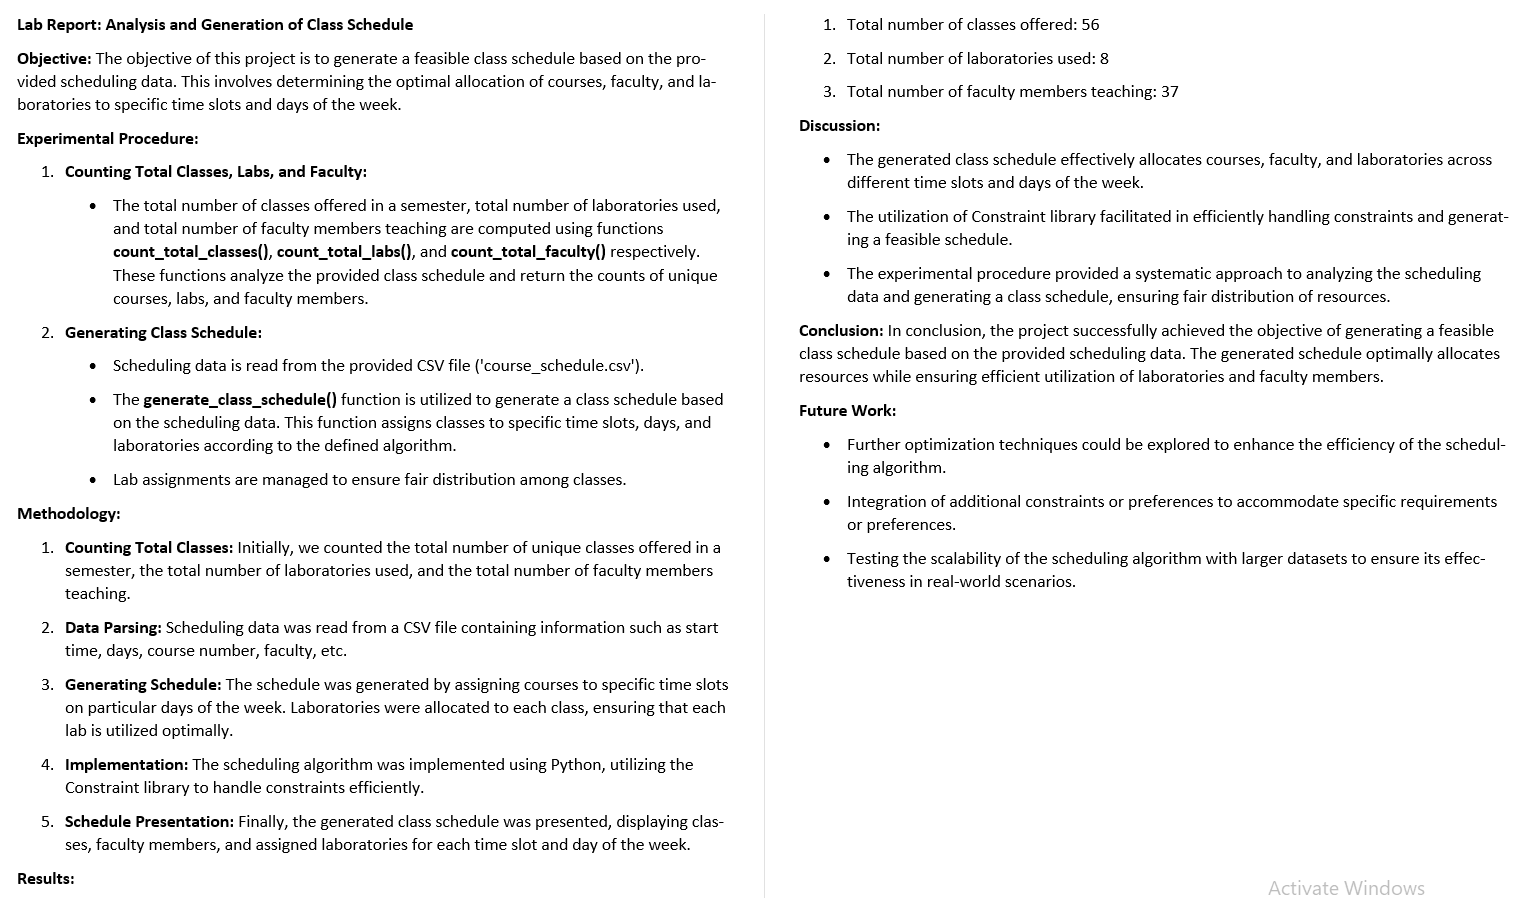